## Testing de la Red

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as opt
from torch import nn as nn
from Custom_models import REDCN1, ResNet9

##Carga de los entrnamientos y el set de prueba

In [2]:
model = ResNet9()
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(model.parameters(), lr=0.001, momentum=0.9)


PATH = "./trained_model/Resnet9_trained.pth"

checkpoint = torch.load(PATH, map_location=torch.device("cpu"))

model.load_state_dict(checkpoint["model_state_dict"])

optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

epoch = checkpoint["epoch"]

graphic1 = checkpoint["loss_epoch"]

graphic2 = checkpoint["loss_epoch_validation"]
class_total = checkpoint["class_total"]
class_correct = checkpoint["class_correct"]


PATH2 = "./DATA/DATA.pth"

dataset = torch.load(PATH2)
classes = dataset["classes"]
print(epoch)

model.eval()
model.train()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]


ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

##Funcion de perdida

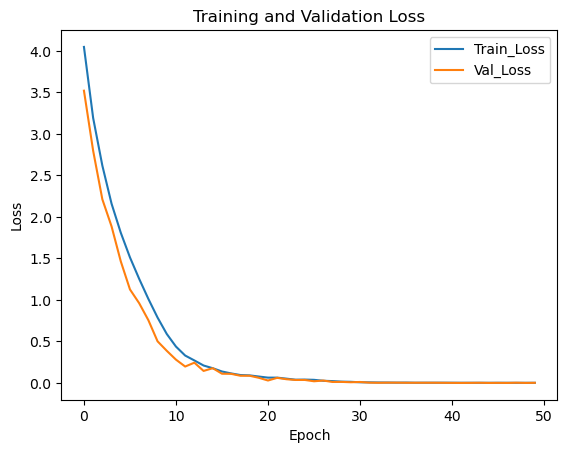

In [3]:
plt.plot(graphic1, label="Train_Loss")
plt.plot(graphic2, label="Val_Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Precision de la Red global y por clases

In [7]:
for i in range(len(classes)):
    if class_total[i] > 0:
        print(
            f"Test Accuracy of class {classes[i]} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly"
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    f"\nTest Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly"
)

Test Accuracy of class apple : 80.0% where 80 of 100 were predicted correctly
Test Accuracy of class aquarium_fish : 71.0% where 71 of 100 were predicted correctly
Test Accuracy of class baby : 55.0% where 55 of 100 were predicted correctly
Test Accuracy of class bear : 30.0% where 30 of 100 were predicted correctly
Test Accuracy of class beaver : 36.0% where 36 of 100 were predicted correctly
Test Accuracy of class bed : 50.0% where 50 of 100 were predicted correctly
Test Accuracy of class bee : 63.0% where 63 of 100 were predicted correctly
Test Accuracy of class beetle : 52.0% where 52 of 100 were predicted correctly
Test Accuracy of class bicycle : 75.0% where 75 of 100 were predicted correctly
Test Accuracy of class bottle : 62.0% where 62 of 100 were predicted correctly
Test Accuracy of class bowl : 39.0% where 39 of 100 were predicted correctly
Test Accuracy of class boy : 36.0% where 36 of 100 were predicted correctly
Test Accuracy of class bridge : 54.0% where 54 of 100 were p

##Mapas de calor de la primera capa convolucional

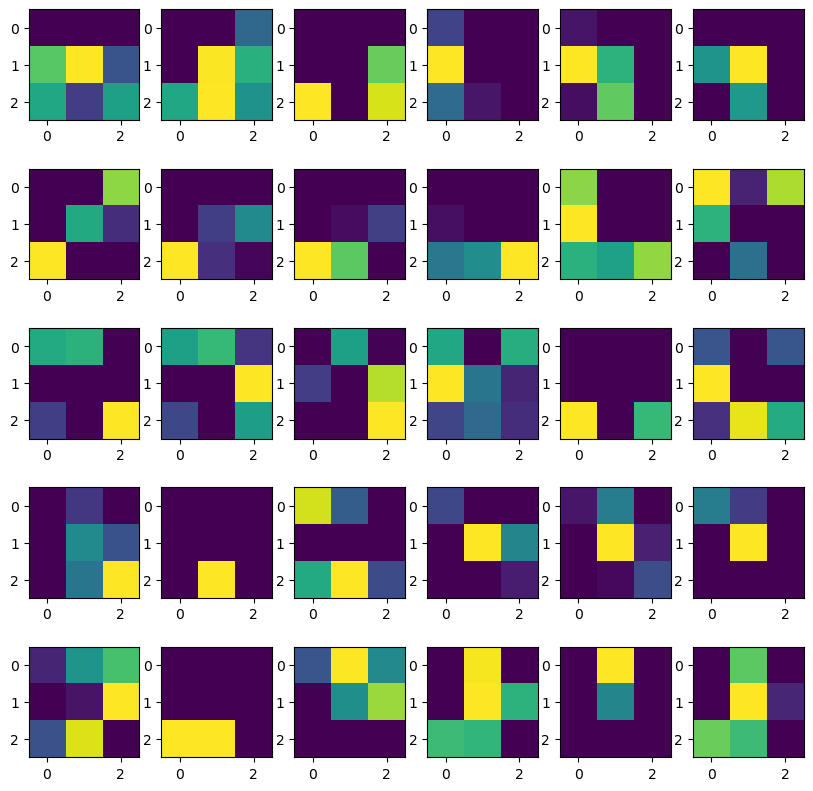

In [5]:
weight2 = []
for x in model.state_dict()["conv1.0.weight"]:
    for y in x:
        weight = y
        weight = weight / weight.max()
        weight = np.clip(weight, 0, 1)
        weight2.append(weight)


fig, axis = plt.subplots(nrows=5, ncols=6, figsize=(10, 10))


for ax, a in zip(axis.ravel(), range(30)):
    ax.imshow(weight2[a])

##Mapas de calor de la segunda capa convolucional

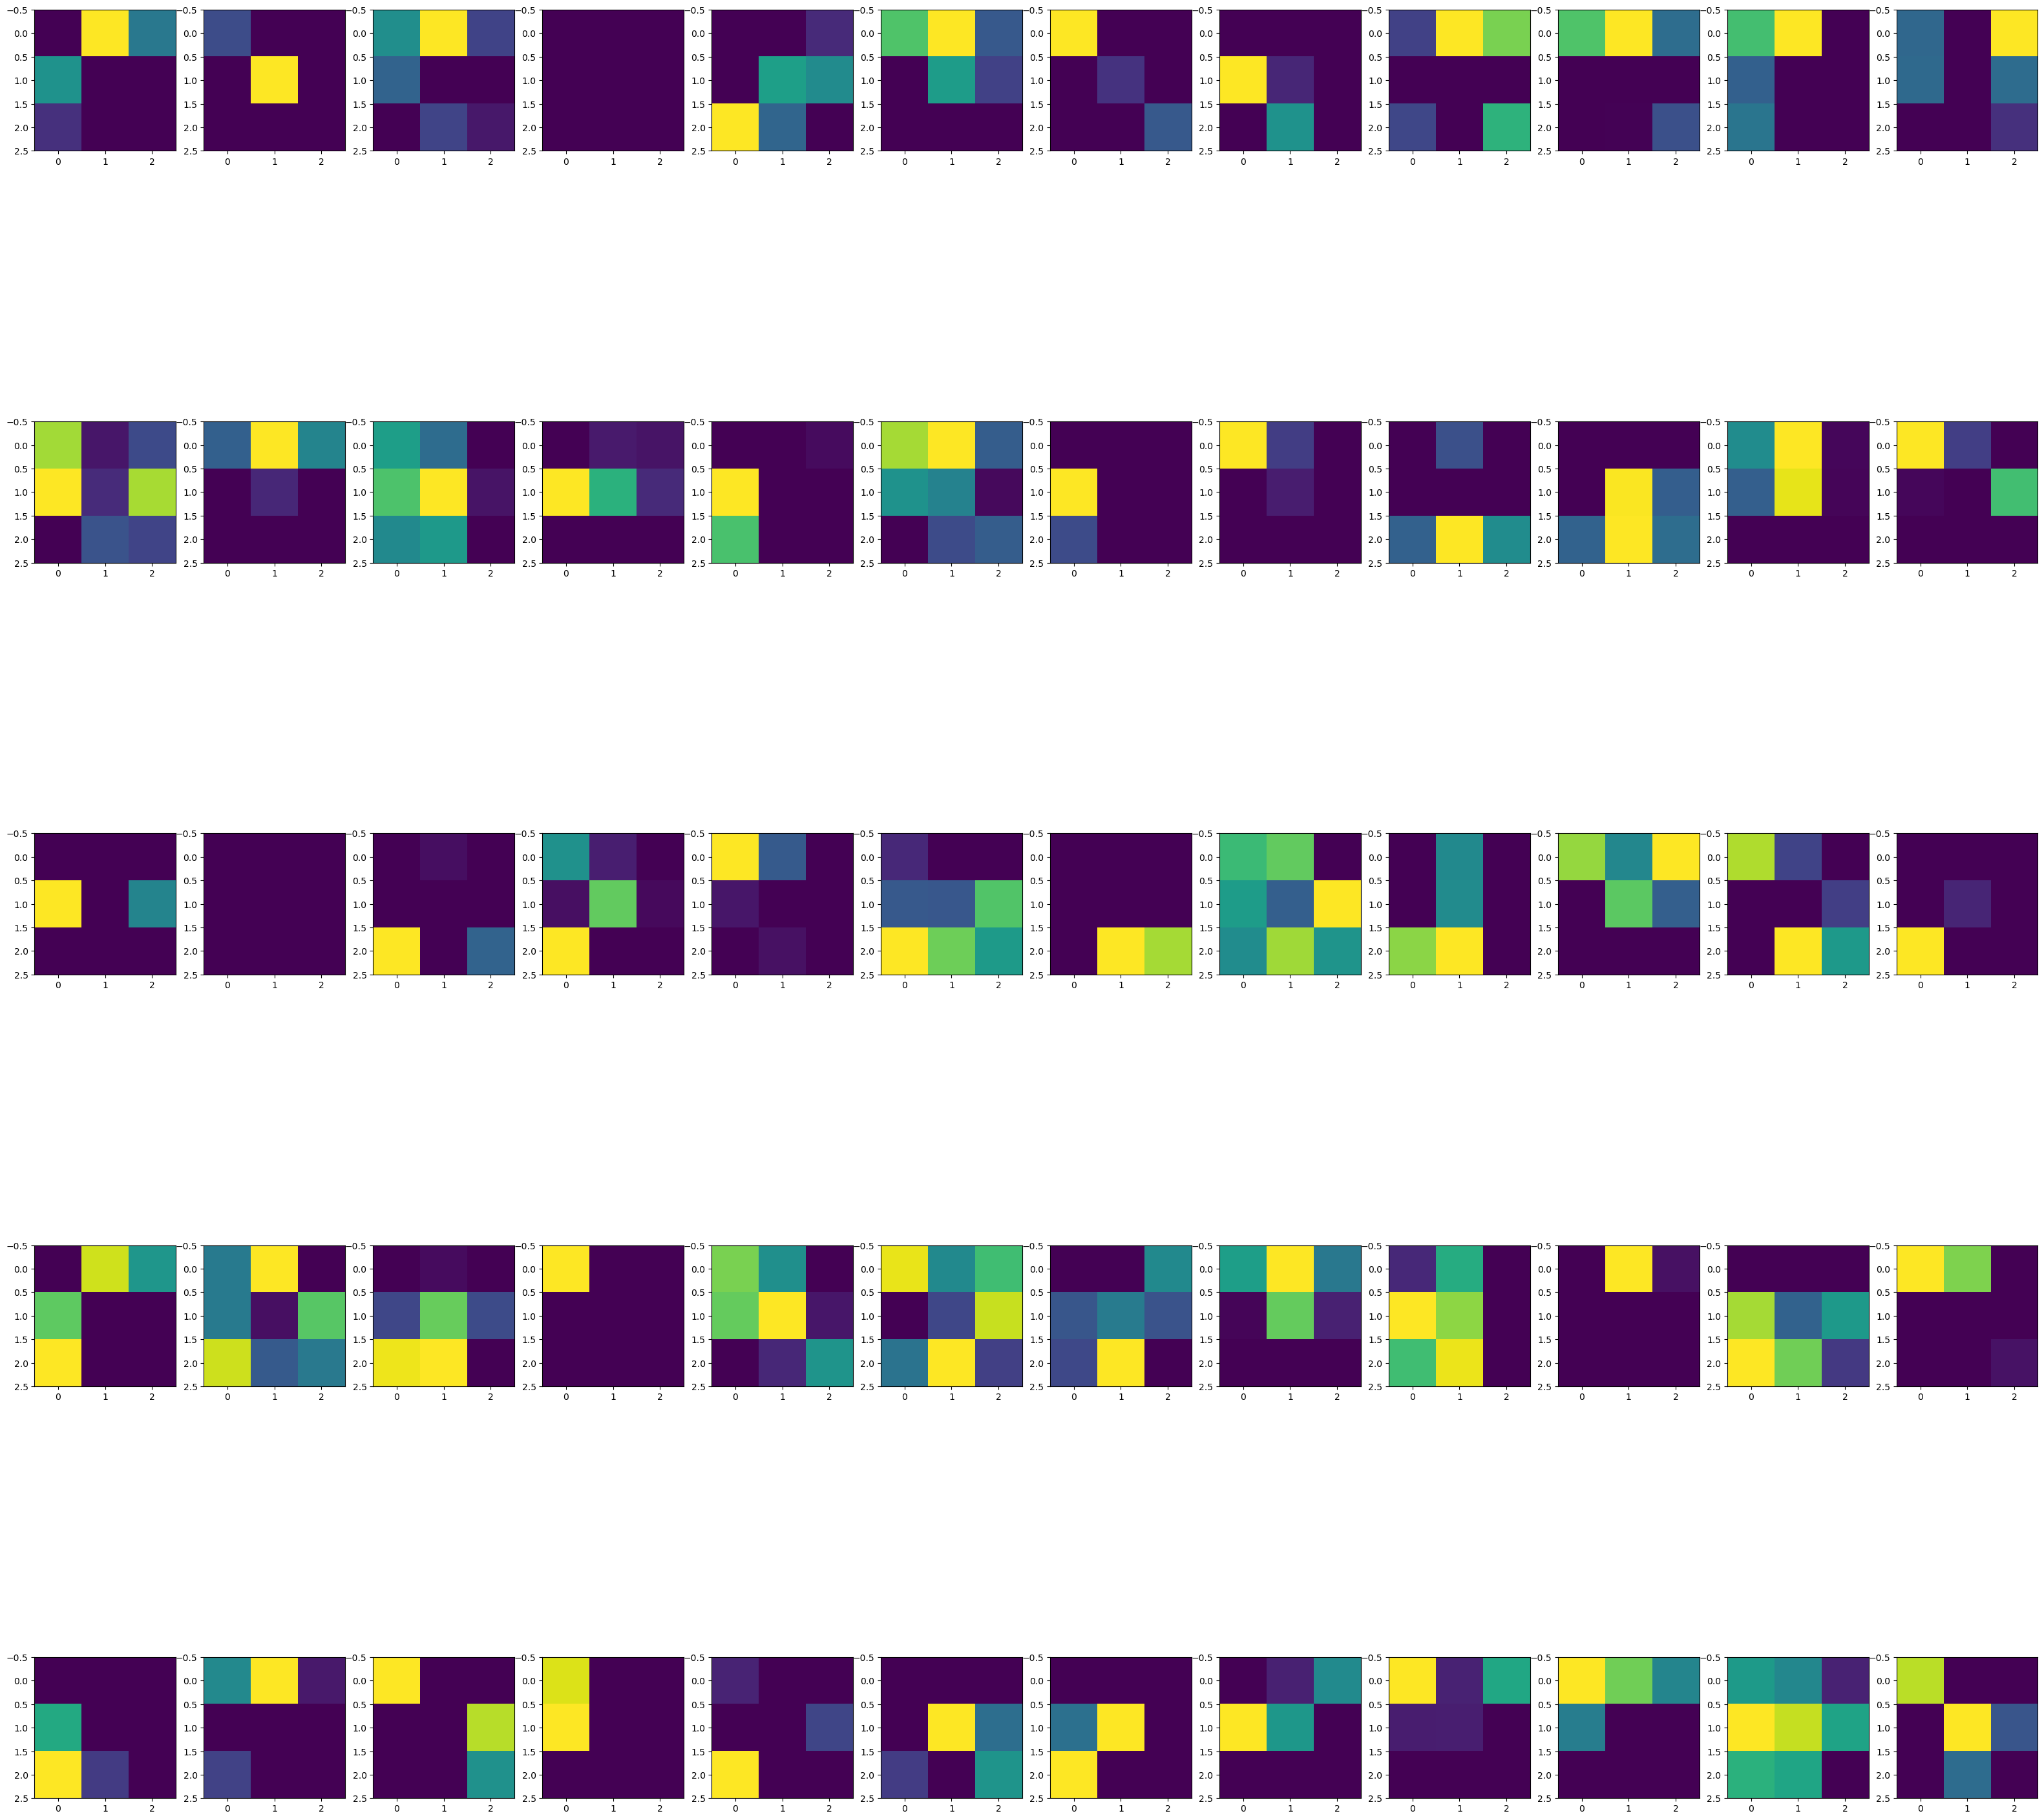

In [6]:
weight4 = []
for x in model.state_dict()["conv2.0.weight"]:
    for y in x:
        weight3 = y
        weight3 = weight3 / weight3.max()
        weight3 = np.clip(weight3, 0, 1)
        weight4.append(weight3)

fig, axis = plt.subplots(nrows=5, ncols=12, figsize=(40, 40))

for ax, a in zip(axis.ravel(), range(60)):
    ax.imshow(weight4[a])

##Mapas de calor de la Tercera capa convolucional